Problem Set 3: EDA para problema de Enrollement
===

#### Importación librerías de trabajo


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import summarytools
import statsmodels.formula.api as smf

In [ ]:
# Importación dataset de trabajo

df = pd.read_stata('casestudy_dropout.dta')

In [ ]:
print(df.shape)
display(df.sample(5))

(8516, 19)


,IDstudent,IDschool,SchoolGrade2022,DropoutDate,DayOfWeekDroppedOut,PrioritaryStudentIn2021,Female,Age,GPAin2021,AttendanceIn2021,GraduatedIn2021,Migrant,ListedInDropoutReport,SchoolPrincipalADP,EnrolledByAug312022,GraduatedIn2022,MunicipalSchool,SchoolDaysFromMay302022,DroppedOutMay30Before
3493,3494.0,8542,7.0,2022-04-28,4.0,1,1,11,5.2,47,1.0,0.0,1.0,1.0,0.0,0.0,1.0,22,1.0
1053,1054.0,1755,5.0,2022-05-17,2.0,0,1,9,5.8,100,1.0,0.0,0.0,0.0,1.0,1.0,0.0,9,1.0
7777,7778.0,25368,7.0,2022-06-01,3.0,1,0,11,5.2,65,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-2,0.0
7462,7463.0,24685,3.0,2022-05-05,4.0,1,1,7,7.0,90,1.0,0.0,0.0,0.0,1.0,1.0,0.0,17,1.0
3797,3798.0,9077,11.0,2022-05-24,2.0,0,1,18,4.6,100,1.0,1.0,0.0,1.0,0.0,0.0,1.0,4,1.0


#### **Descripción del dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8516 entries, 0 to 8515
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   IDstudent                8516 non-null   float32       
 1   IDschool                 8516 non-null   int32         
 2   SchoolGrade2022          8516 non-null   float32       
 3   DropoutDate              8516 non-null   datetime64[ns]
 4   DayOfWeekDroppedOut      8516 non-null   float32       
 5   PrioritaryStudentIn2021  8516 non-null   int8          
 6   Female                   8516 non-null   int8          
 7   Age                      8516 non-null   int8          
 8   GPAin2021                8416 non-null   float64       
 9   AttendanceIn2021         8516 non-null   int8          
 10  GraduatedIn2021          8516 non-null   float32       
 11  Migrant                  8516 non-null   float32       
 12  ListedInDropoutReport    8516 non-

In [ ]:
df.columns = [
    'id_estudiante',
    'id_colegio',
    'curso_año_2022',
    'fecha_abandono',
    'día_semana_abandono',
    'estudiante_prioritario_2021',
    'mujer',
    'edad',
    'rendimiento_2021',
    'asistencia_2021',
    'graduado_2021',
    'estudiante_migrante',
    'listado_reporte_por_abandono',
    'director_ADP',
    'reincorporado_al_30_agosto',
    'graduado_2022',
    'establecimiento_municipal',
    'dias_lectivos_mayo',
    'abandono_antes_30_mayo'
]

##### Valores únicos por atributos

In [ ]:
df.nunique()

Id_estudiante                  8516
Id_colegio                     2261
curso_año_2022                   12
fecha_abandono                   61
día_semana_abandono               5
estudiante_prioritario_2021       2
mujer                             2
edad                             14
rendimiento_2021                 60
asistencia_2021                 101
graduado_2021                     2
estudiante_migrante               2
reportado_por_abandono            2
director_ADP                      2
reincorporado_al_30_agosto        2
graduado_2022                     2
establecimiento_municipal         2
dias_lectivos_mayo               61
abandono_antes_30_mayo            2
dtype: int64

##### Revisión de datos faltantes

In [ ]:
df.isnull().sum()

Id_estudiante                    0
Id_colegio                       0
curso_año_2022                   0
fecha_abandono                   0
día_semana_abandono              0
estudiante_prioritario_2021      0
mujer                            0
edad                             0
rendimiento_2021               100
asistencia_2021                  0
graduado_2021                    0
estudiante_migrante              0
reportado_por_abandono           0
director_ADP                     0
reincorporado_al_30_agosto       0
graduado_2022                    0
establecimiento_municipal        0
dias_lectivos_mayo               0
abandono_antes_30_mayo           0
dtype: int64

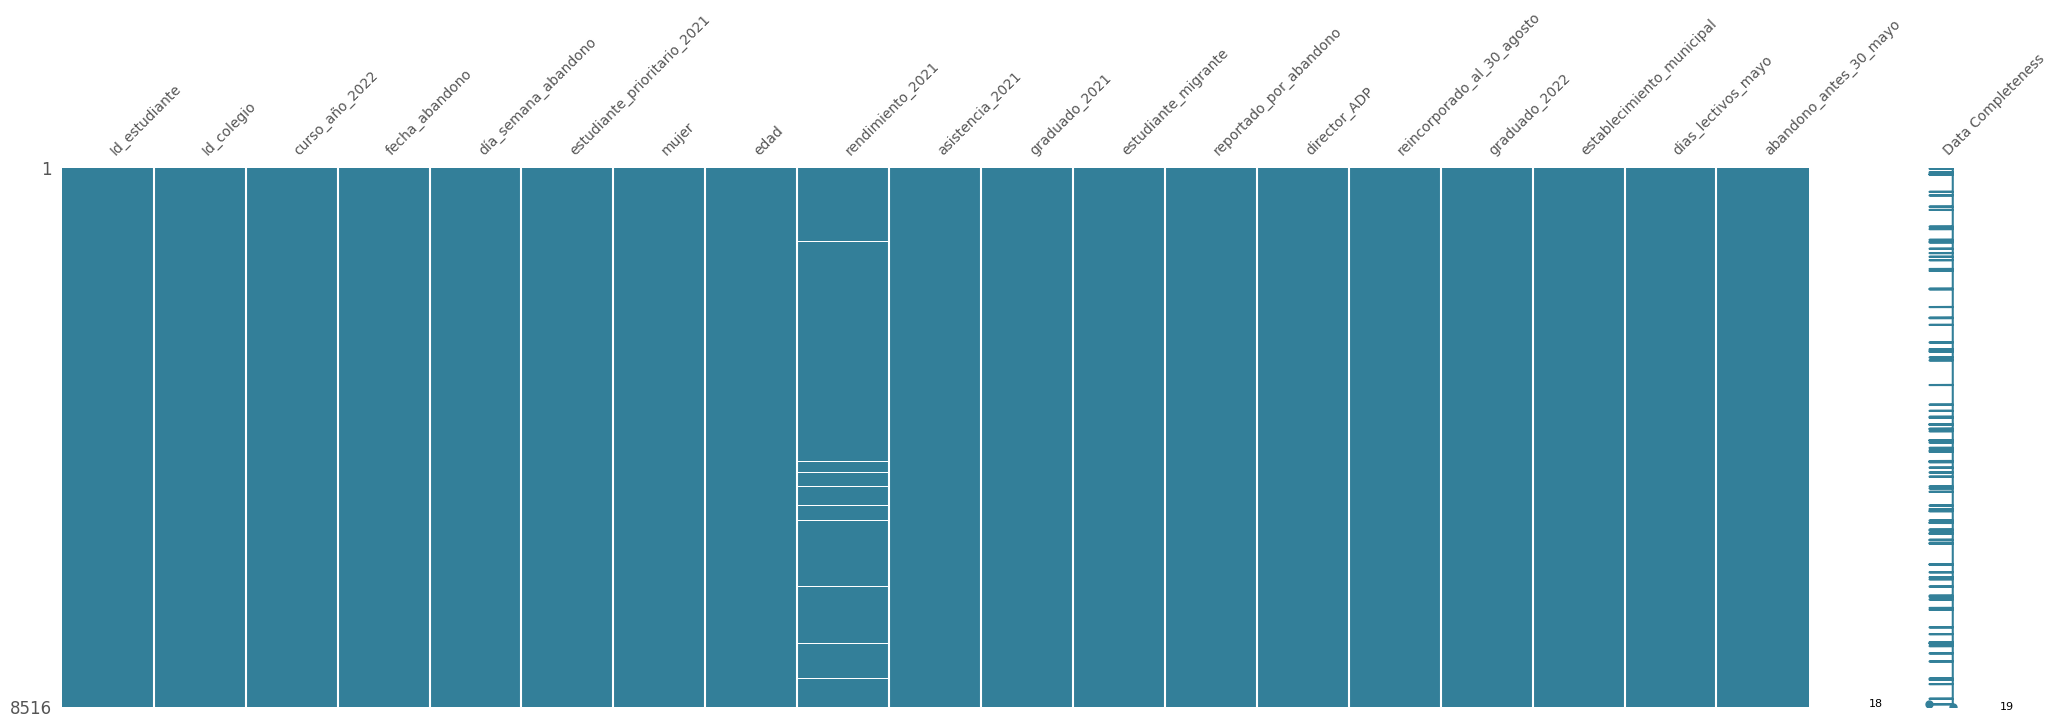

In [ ]:
# Matriz de nulos

msno.matrix(df, figsize=(25, 7), fontsize=10, labels=True, color=(0.2, 0.5, 0.6));

#### **Resumen descriptivo atributos**

In [ ]:
round(df.iloc[:,2:].describe(),3).T

,count,mean,min,25%,50%,75%,max,std
curso_año_2022,8516.0,7.397,1.0,5.0,8.0,10.0,12.0,3.145
fecha_abandono,8516,2022-05-31 11:43:25.730389760,2022-04-18 00:00:00,2022-05-05 00:00:00,2022-05-26 00:00:00,2022-06-23 00:00:00,2022-07-29 00:00:00,NaN
día_semana_abandono,8516.0,2.894,1.0,2.0,3.0,4.0,5.0,1.408
estudiante_prioritario_2021,8516.0,0.647,0.0,0.0,1.0,1.0,1.0,0.478
mujer,8516.0,0.531,0.0,0.0,1.0,1.0,1.0,0.499
edad,8516.0,12.054,6.0,9.0,13.0,15.0,19.0,3.46
rendimiento_2021,8416.0,5.514,1.0,4.9,5.6,6.3,7.0,1.018
asistencia_2021,8516.0,82.943,0.0,85.0,86.0,96.0,100.0,22.169
graduado_2021,8516.0,0.907,0.0,1.0,1.0,1.0,1.0,0.29
estudiante_migrante,8516.0,0.117,0.0,0.0,0.0,0.0,1.0,0.322


#### Visualización univariada

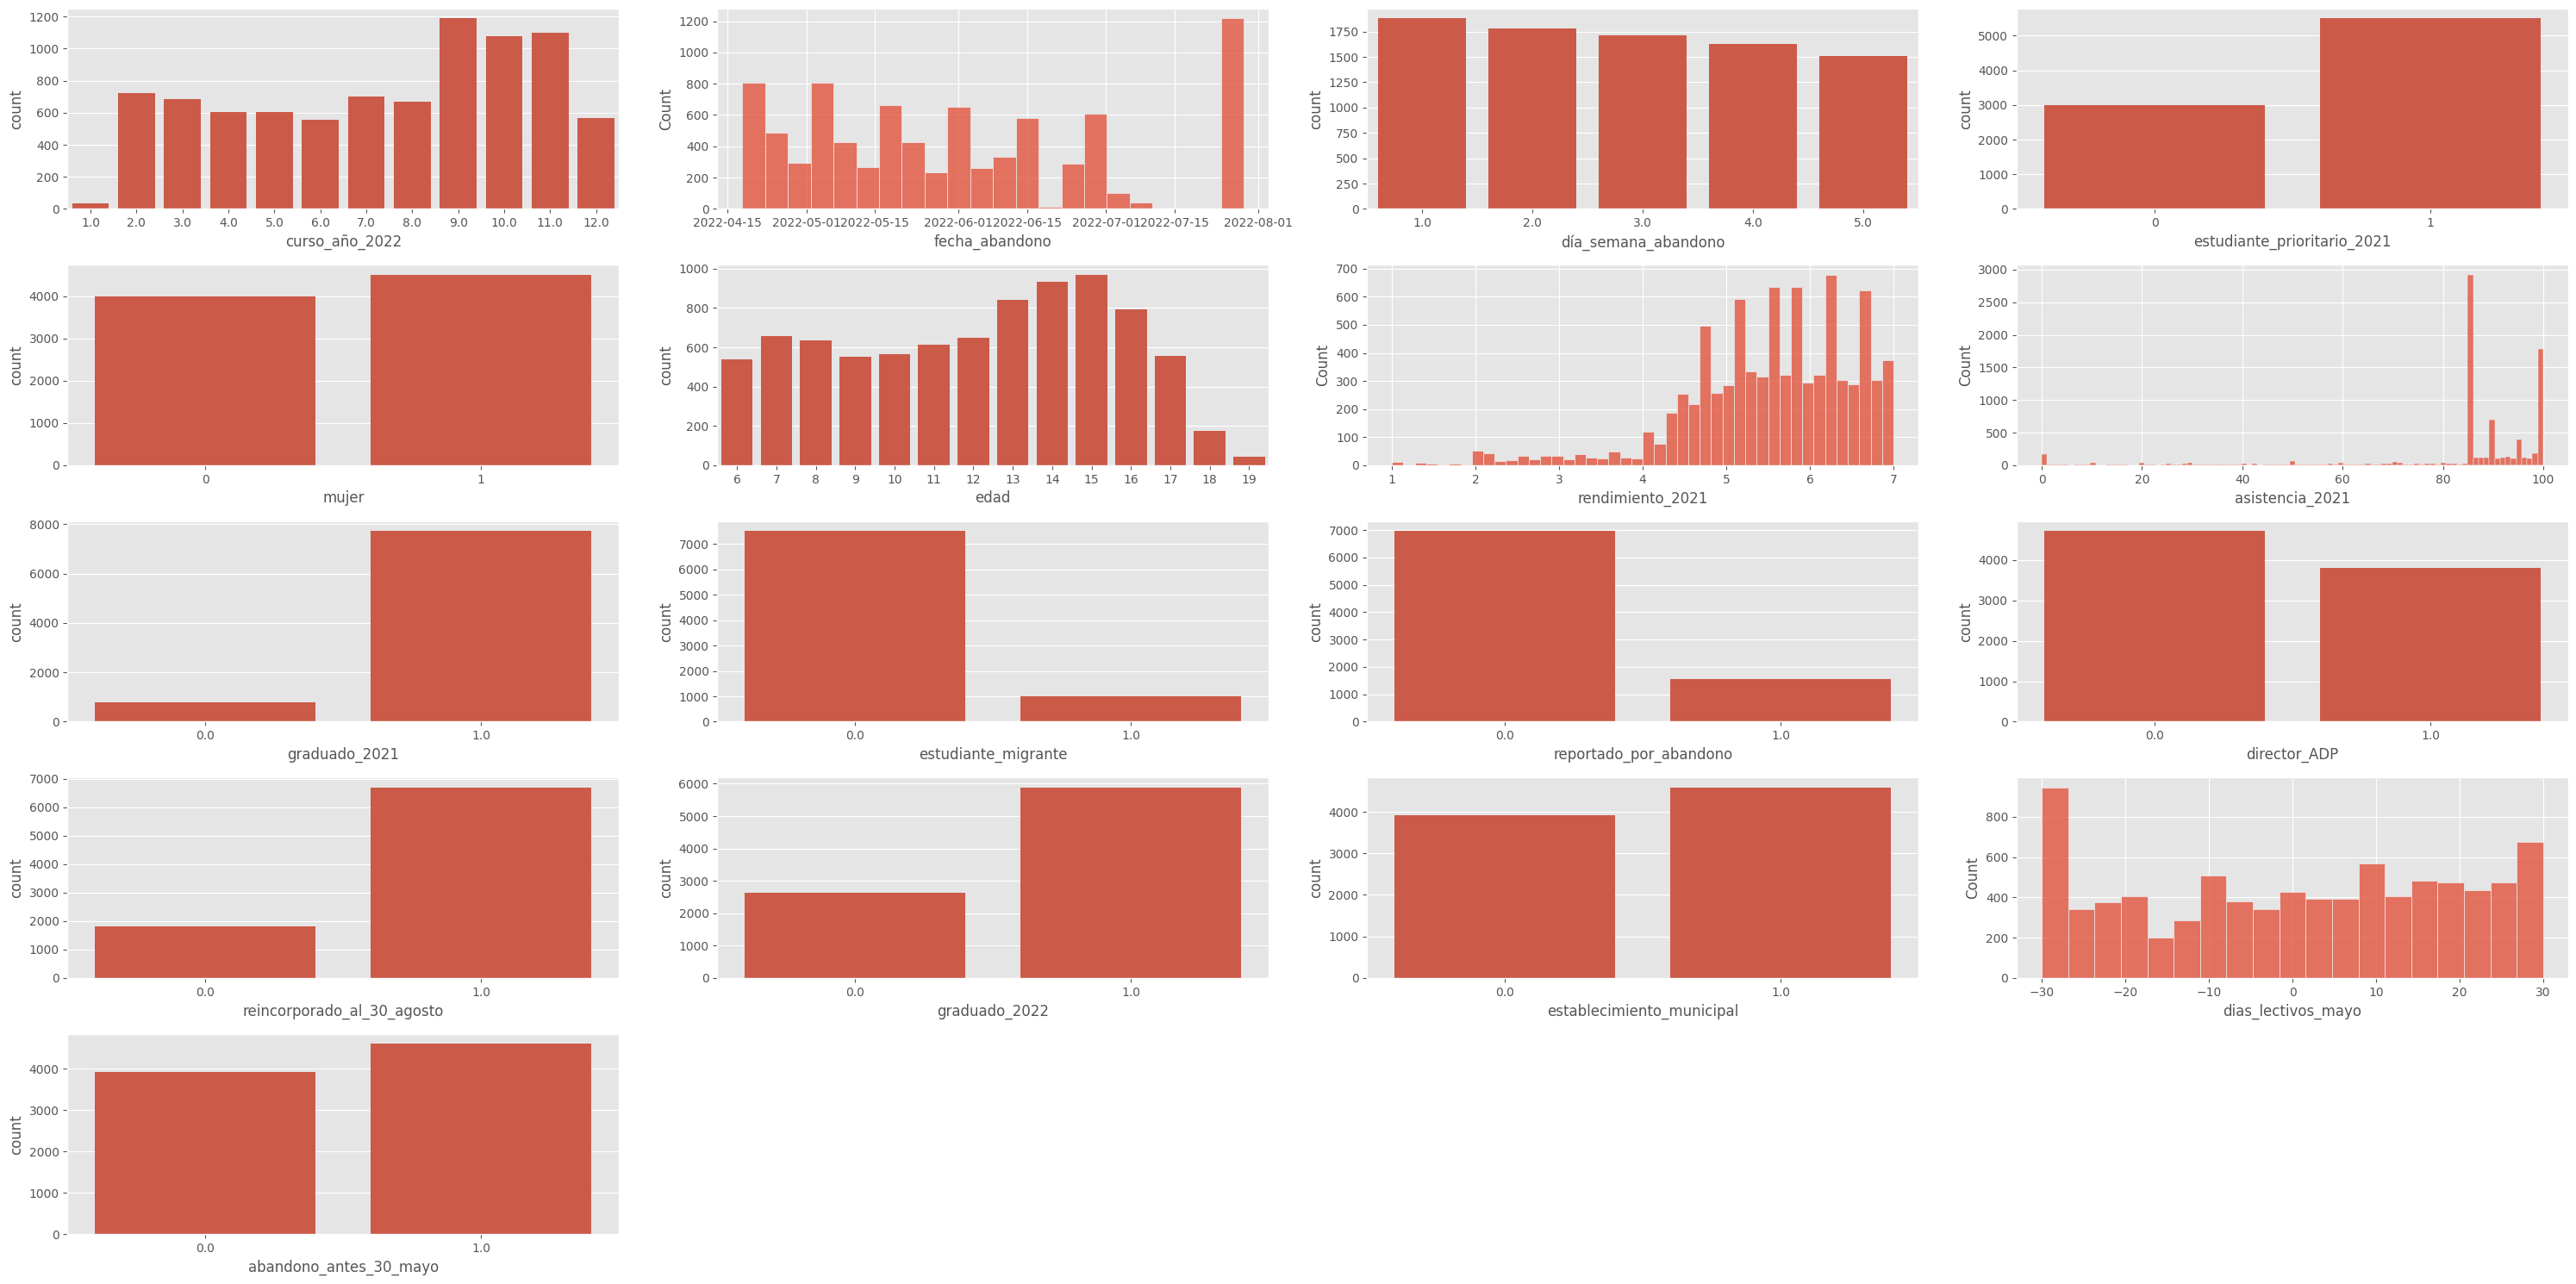

In [ ]:

df1 = df.iloc[:,2:]

nrows=5
ncols=4

plt.figure(figsize=(30,15))

for cols in df1.columns:
    if df1[cols].nunique() < 20:
        plt.subplot(nrows, ncols, df1.columns.get_loc(cols)+1)
        sns.countplot(data=df1, x=cols)
        #plt.title(cols)

    else:
        plt.subplot(nrows, ncols, df1.columns.get_loc(cols)+1)
        sns.histplot(df1[cols])
        #plt.title(cols)

plt.tight_layout();

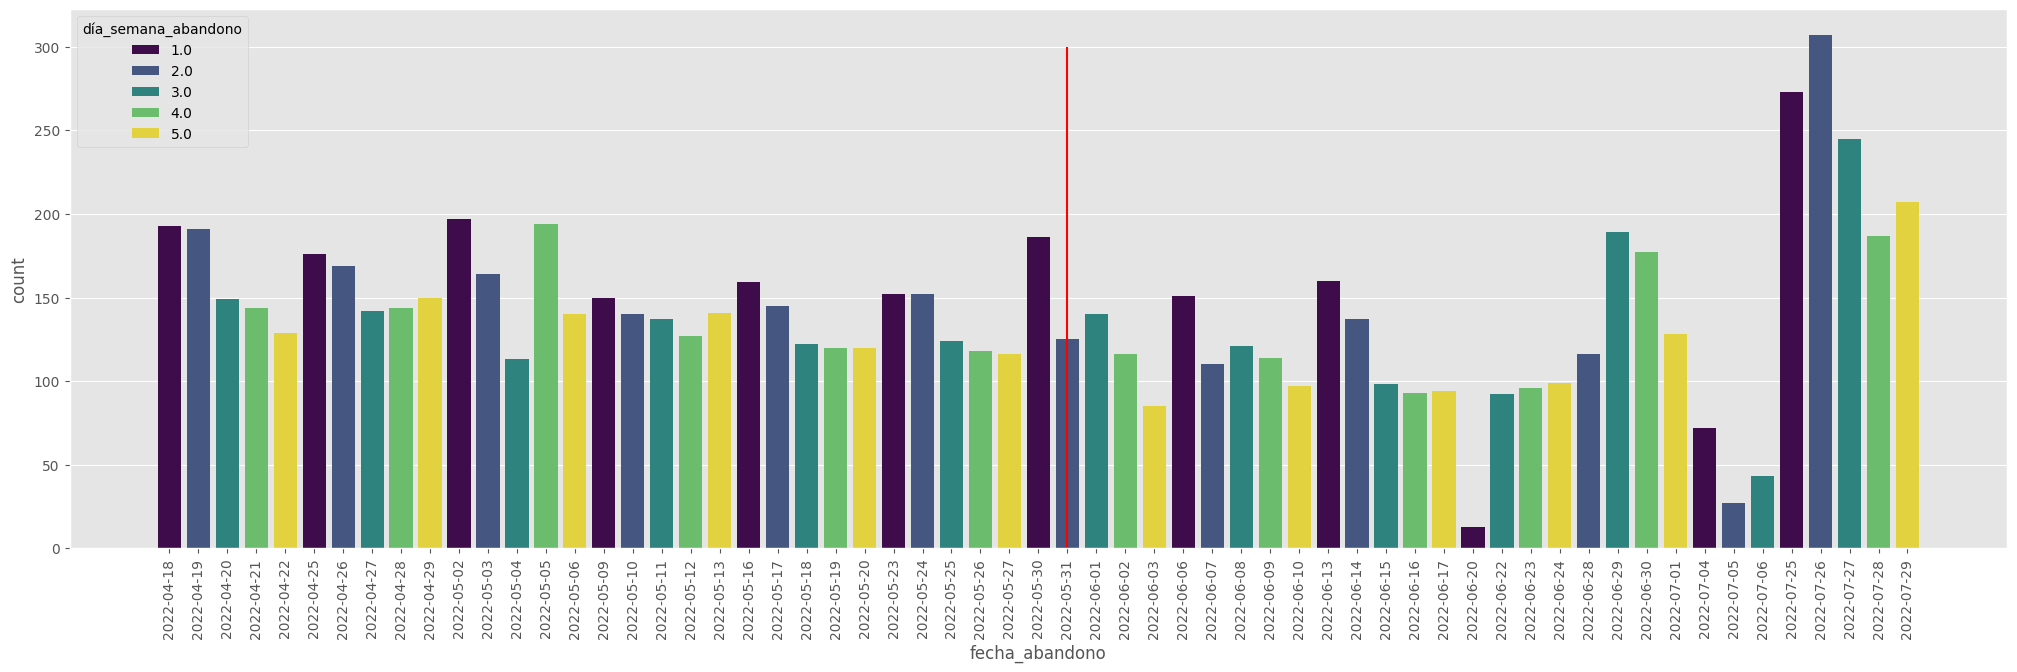

In [ ]:
# Grafico Fecha de abandono

plt.figure(figsize=(25,7))
sns.countplot(data=df, x='fecha_abandono',order=df['fecha_abandono'].sort_values().unique(), hue='día_semana_abandono', palette='viridis')
plt.xticks(rotation=90)
plt.vlines(x='2022-05-31', ymin=0, ymax=300, color='red', linestyle='-');

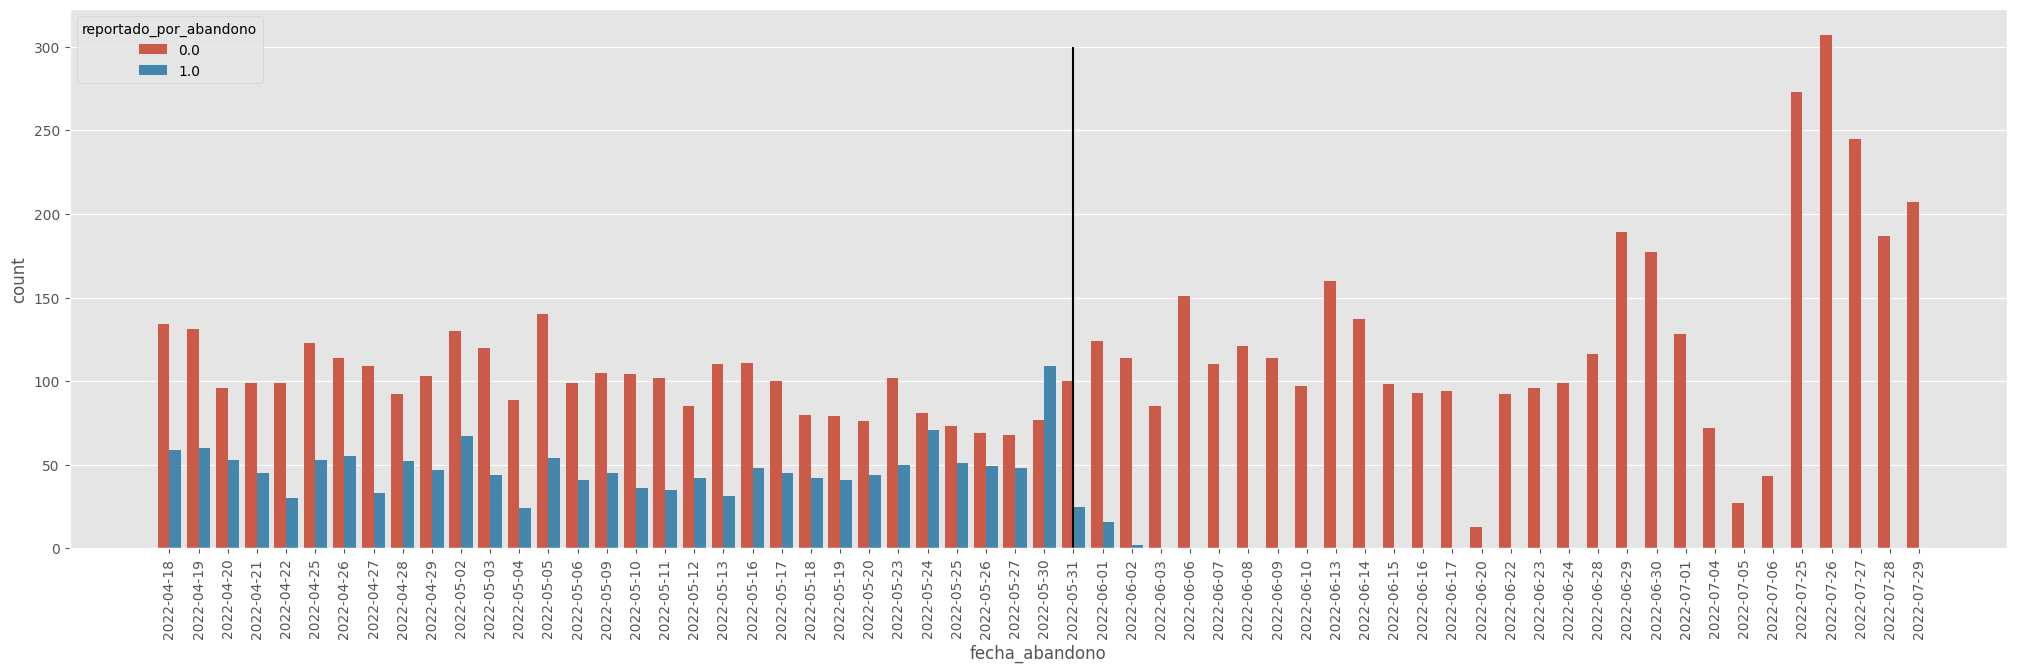

In [ ]:
plt.figure(figsize=(25,7))
sns.countplot(data=df, x='fecha_abandono',order=df['fecha_abandono'].sort_values().unique(), hue='reportado_por_abandono')
plt.xticks(rotation=90)
plt.vlines(x='2022-05-31', ymin=0, ymax=300, color='black', linestyle='-');

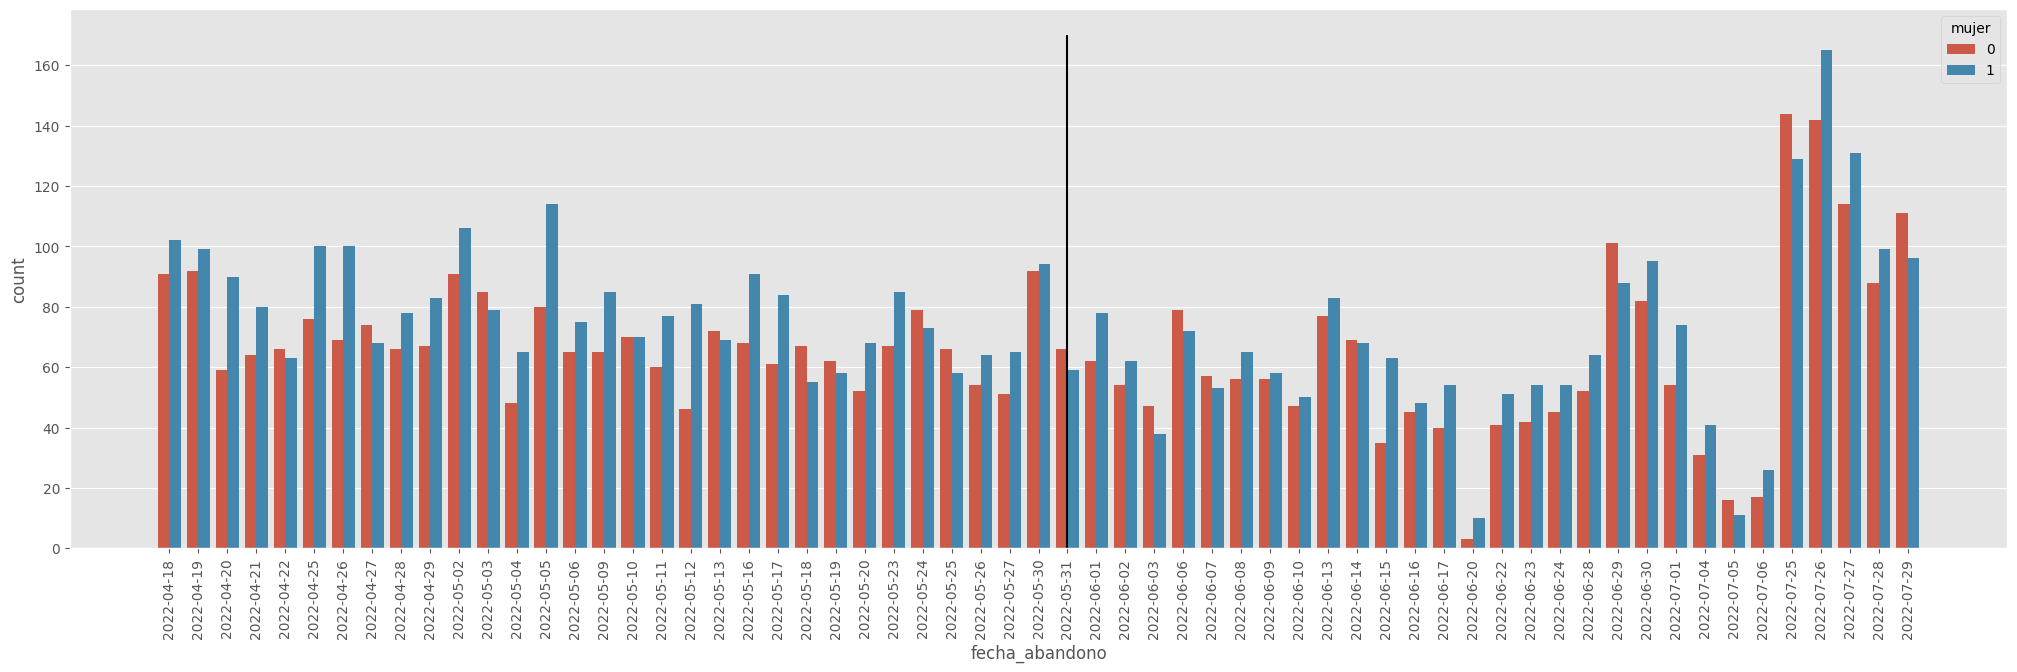

In [ ]:
plt.figure(figsize=(25,7))
sns.countplot(data=df, x='fecha_abandono',order=df['fecha_abandono'].sort_values().unique(), hue='mujer')
plt.xticks(rotation=90)
plt.vlines(x='2022-05-31', ymin=0, ymax=170, color='black', linestyle='-');

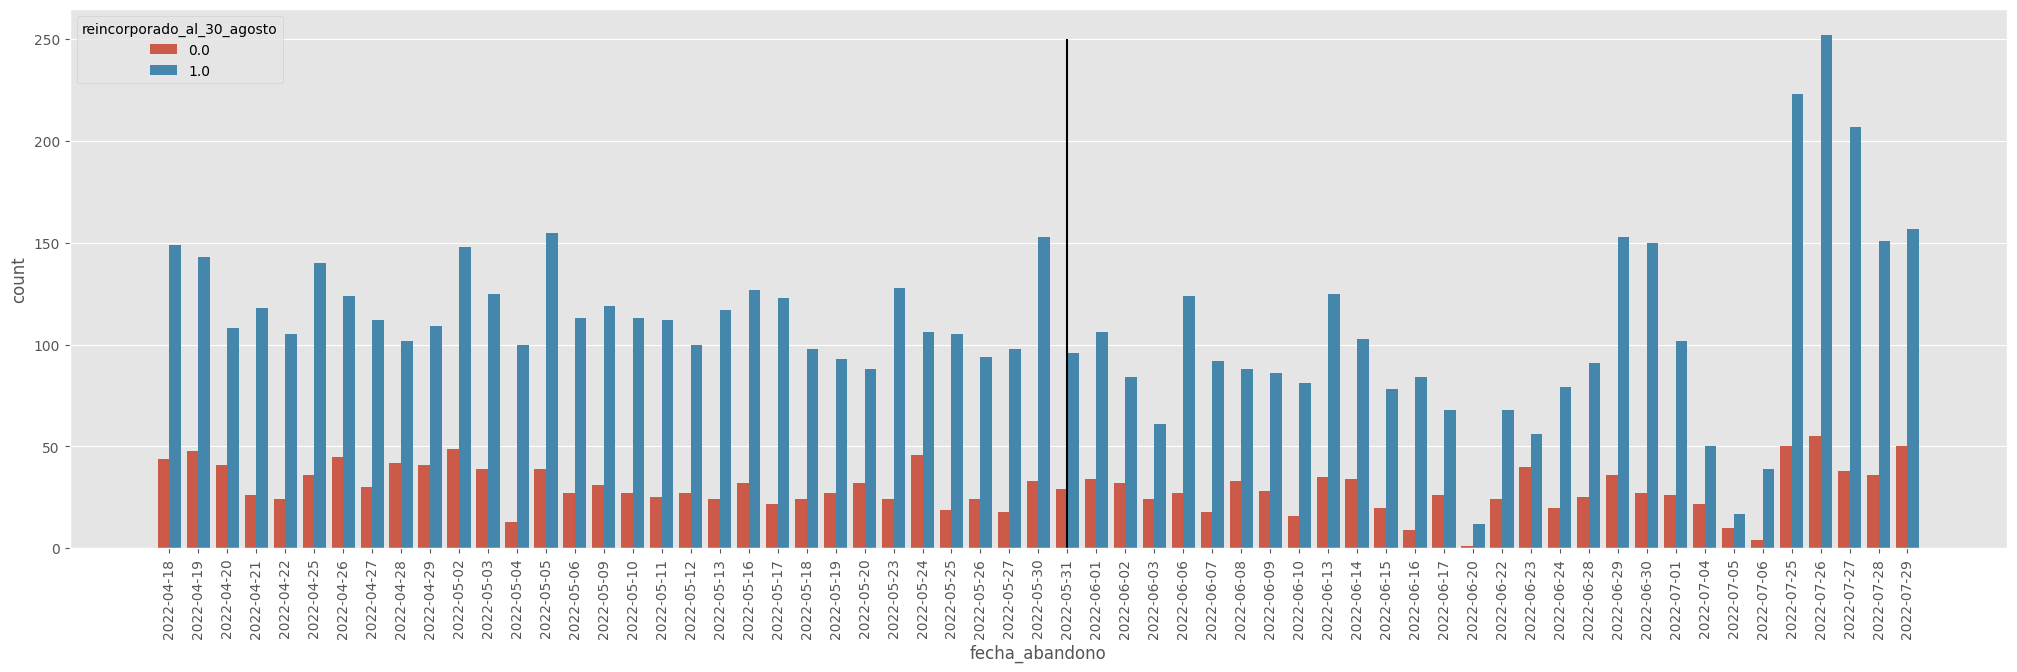

In [ ]:
plt.figure(figsize=(25,7))
sns.countplot(data=df, x='fecha_abandono',order=df['fecha_abandono'].sort_values().unique(), hue='reincorporado_al_30_agosto')
plt.xticks(rotation=90)
plt.vlines(x='2022-05-31', ymin=0, ymax=250, color='black', linestyle='-');

##### Confección de nuevos atributos

In [ ]:
# Nota menor a 4.5 es bajo rendimiento

df['bajo_rendimiento'] = np.where(df['rendimiento_2021'] < 4.5, 1, 0)
df['bajo_rendimiento'].value_counts()

bajo_rendimiento
0    7629
1     887
Name: count, dtype: int64

In [ ]:
# Nivel enseñanza

df['nivel_enseñanza'] = np.where(df['curso_año_2022'] < 9, 'Primaria', 'Secundaria')
df['nivel_enseñanza'].value_counts()

nivel_enseñanza
Primaria      4579
Secundaria    3937
Name: count, dtype: int64

In [ ]:
df['periodo_abandono'] = np.where(df['fecha_abandono'] < '2022-05-31', 'Antes_corte', 'Después_corte')
df['periodo_abandono'].value_counts()

periodo_abandono
Antes_corte      4604
Después_corte    3912
Name: count, dtype: int64

In [ ]:
import scipy.stats as stats

tab1=pd.crosstab(df['Female'], df['ListedInDropoutReport'], margins=False)

# Cálculo de la Chi cuadrado y p-valor
chi2, p, dof, expected = stats.chi2_contingency(observed=tab1)

display(tab1)
print("\nValores esperados:\n", expected)
print("\nValor de Chi cuadrado:", chi2)
print("\nP-valor:", p)
print("\nGrados de libertad:", dof)


ListedInDropoutReport,0.0,1.0
Female,,
0,3339,659
1,3630,888



Valores esperados:
 [[3271.73109441  726.26890559]
 [3697.26890559  820.73109441]]

Valor de Chi cuadrado: 14.138576278859105

P-valor: 0.0001698252030450571

Grados de libertad: 1


##### Función para implementar test de Chi-cuadrado

In [ ]:
def test_chi2(df, var1, var2):
    print("\n\nTEST CHI-CUADRADO PARA LAS VARIABLES", var1, "Y", var2)
    print("\nTabla de contingencia Normalizada:")
    display(round(pd.crosstab(df[var1], df[var2], margins=True, margins_name="Total",normalize='index')*100,2))
    tab=pd.crosstab(df[var1], df[var2], margins=False)
    chi2, p, dof, expected = stats.chi2_contingency(observed=tab)
    print("\nValores Observados")
    display(tab)
    print("\nValores esperados:\n", expected)
    print("\nHo: Las variables", var1, "y", var2, "son independientes")
    print("Ha: Las variables", var1, "y", var2, "son dependientes")
    print("\nValor de Chi cuadrado:", chi2)
    print("P-valor:", p)
    print("Grados de libertad:", dof)
    print("\nConclusión:")
    if p < 0.05:
        print("Rechazamos la hipótesis nula. Las variables", var1, "y", var2, "no varían de forma independiente")
    else:
        print("\nNo rechazamos la hipótesis nula", var1, "y", var2, "varían de forma independiente")

In [ ]:
test_chi2(df,'Female','ListedInDropoutReport')



TEST CHI-CUADRADO PARA LAS VARIABLES Female Y ListedInDropoutReport

Tabla de contingencia Normalizada:


ListedInDropoutReport,0.0,1.0
Female,,
0,83.52,16.48
1,80.35,19.65
Total,81.83,18.17



Valores Observados


ListedInDropoutReport,0.0,1.0
Female,,
0,3339,659
1,3630,888



Valores esperados:
 [[3271.73109441  726.26890559]
 [3697.26890559  820.73109441]]

Ho: Las variables Female y ListedInDropoutReport son independientes
Ha: Las variables Female y ListedInDropoutReport son dependientes

Valor de Chi cuadrado: 14.138576278859105
P-valor: 0.0001698252030450571
Grados de libertad: 1

Conclusión:
Rechazamos la hipótesis nula. Las variables Female y ListedInDropoutReport no varían de forma independiente


#### Test de chi-cuadrado entre vector objetivo y variables categóricas del dataset

In [ ]:
# Del dataset original, se eliminan las variables que no se utilizarán en el análisis (numéricas)

categoricas = [
 'PrioritaryStudentIn2021',
 'Female',
 'GraduatedIn2021',
 'Migrant',
 'ListedInDropoutReport',
 'SchoolPrincipalADP',
 'GraduatedIn2022',
 'MunicipalSchool',
 'DroppedOutMay30Before']

In [ ]:
# Se realiza el test de Chi cuadrado para todas las variables categóricas utilizando una lista de comprensión

[test_chi2(df,cats,'EnrolledByAug312022') for cats in categoricas];



TEST CHI-CUADRADO PARA LAS VARIABLES PrioritaryStudentIn2021 Y EnrolledByAug312022

Tabla de contingencia Normalizada:


EnrolledByAug312022,0.0,1.0
PrioritaryStudentIn2021,,
0,19.55,80.45
1,22.15,77.85
Total,21.23,78.77



Valores Observados


EnrolledByAug312022,0.0,1.0
PrioritaryStudentIn2021,,
0,588,2420
1,1220,4288



Valores esperados:
 [[ 638.61719117 2369.38280883]
 [1169.38280883 4338.61719117]]

Ho: Las variables PrioritaryStudentIn2021 y EnrolledByAug312022 son independientes
Ha: Las variables PrioritaryStudentIn2021 y EnrolledByAug312022 son dependientes

Valor de Chi cuadrado: 7.71999751330713
P-valor: 0.00546124715356449
Grados de libertad: 1

Conclusión:
Rechazamos la hipótesis nula. Las variables PrioritaryStudentIn2021 y EnrolledByAug312022 no varían de forma independiente


TEST CHI-CUADRADO PARA LAS VARIABLES Female Y EnrolledByAug312022

Tabla de contingencia Normalizada:


EnrolledByAug312022,0.0,1.0
Female,,
0,18.88,81.12
1,23.31,76.69
Total,21.23,78.77



Valores Observados


EnrolledByAug312022,0.0,1.0
Female,,
0,755,3243
1,1053,3465



Valores esperados:
 [[ 848.80037576 3149.19962424]
 [ 959.19962424 3558.80037576]]

Ho: Las variables Female y EnrolledByAug312022 son independientes
Ha: Las variables Female y EnrolledByAug312022 son dependientes

Valor de Chi cuadrado: 24.54105606262938
P-valor: 7.274320978819562e-07
Grados de libertad: 1

Conclusión:
Rechazamos la hipótesis nula. Las variables Female y EnrolledByAug312022 no varían de forma independiente


TEST CHI-CUADRADO PARA LAS VARIABLES GraduatedIn2021 Y EnrolledByAug312022

Tabla de contingencia Normalizada:


EnrolledByAug312022,0.0,1.0
GraduatedIn2021,,
0.0,40.76,59.24
1.0,19.23,80.77
Total,21.23,78.77



Valores Observados


EnrolledByAug312022,0.0,1.0
GraduatedIn2021,,
0.0,322,468
1.0,1486,6240



Valores esperados:
 [[ 167.72193518  622.27806482]
 [1640.27806482 6085.72193518]]

Ho: Las variables GraduatedIn2021 y EnrolledByAug312022 son independientes
Ha: Las variables GraduatedIn2021 y EnrolledByAug312022 son dependientes

Valor de Chi cuadrado: 197.29790139134636
P-valor: 8.119137619640416e-45
Grados de libertad: 1

Conclusión:
Rechazamos la hipótesis nula. Las variables GraduatedIn2021 y EnrolledByAug312022 no varían de forma independiente


TEST CHI-CUADRADO PARA LAS VARIABLES Migrant Y EnrolledByAug312022

Tabla de contingencia Normalizada:


EnrolledByAug312022,0.0,1.0
Migrant,,
0.0,20.82,79.18
1.0,24.35,75.65
Total,21.23,78.77



Valores Observados


EnrolledByAug312022,0.0,1.0
Migrant,,
0.0,1565,5953
1.0,243,755



Valores esperados:
 [[1596.11836543 5921.88163457]
 [ 211.88163457  786.11836543]]

Ho: Las variables Migrant y EnrolledByAug312022 son independientes
Ha: Las variables Migrant y EnrolledByAug312022 son dependientes

Valor de Chi cuadrado: 6.362775785790522
P-valor: 0.011653908584998656
Grados de libertad: 1

Conclusión:
Rechazamos la hipótesis nula. Las variables Migrant y EnrolledByAug312022 no varían de forma independiente


TEST CHI-CUADRADO PARA LAS VARIABLES ListedInDropoutReport Y EnrolledByAug312022

Tabla de contingencia Normalizada:


EnrolledByAug312022,0.0,1.0
ListedInDropoutReport,,
0.0,13.55,86.45
1.0,55.85,44.15
Total,21.23,78.77



Valores Observados


EnrolledByAug312022,0.0,1.0
ListedInDropoutReport,,
0.0,944,6025
1.0,864,683



Valores esperados:
 [[1479.56223579 5489.43776421]
 [ 328.43776421 1218.56223579]]

Ho: Las variables ListedInDropoutReport y EnrolledByAug312022 son independientes
Ha: Las variables ListedInDropoutReport y EnrolledByAug312022 son dependientes

Valor de Chi cuadrado: 1352.2696467217106
P-valor: 4.94840270008938e-296
Grados de libertad: 1

Conclusión:
Rechazamos la hipótesis nula. Las variables ListedInDropoutReport y EnrolledByAug312022 no varían de forma independiente


TEST CHI-CUADRADO PARA LAS VARIABLES SchoolPrincipalADP Y EnrolledByAug312022

Tabla de contingencia Normalizada:


EnrolledByAug312022,0.0,1.0
SchoolPrincipalADP,,
0.0,19.06,80.94
1.0,23.92,76.08
Total,21.23,78.77



Valores Observados


EnrolledByAug312022,0.0,1.0
SchoolPrincipalADP,,
0.0,899,3817
1.0,909,2891



Valores esperados:
 [[1001.23626116 3714.76373884]
 [ 806.76373884 2993.23626116]]

Ho: Las variables SchoolPrincipalADP y EnrolledByAug312022 son independientes
Ha: Las variables SchoolPrincipalADP y EnrolledByAug312022 son dependientes

Valor de Chi cuadrado: 29.410989181429507
P-valor: 5.854472286371369e-08
Grados de libertad: 1

Conclusión:
Rechazamos la hipótesis nula. Las variables SchoolPrincipalADP y EnrolledByAug312022 no varían de forma independiente


TEST CHI-CUADRADO PARA LAS VARIABLES GraduatedIn2022 Y EnrolledByAug312022

Tabla de contingencia Normalizada:


EnrolledByAug312022,0.0,1.0
GraduatedIn2022,,
0.0,61.20,38.80
1.0,3.41,96.59
Total,21.23,78.77



Valores Observados


EnrolledByAug312022,0.0,1.0
GraduatedIn2022,,
0.0,1607,1019
1.0,201,5689



Valores esperados:
 [[ 557.51620479 2068.48379521]
 [1250.48379521 4639.51620479]]

Ho: Las variables GraduatedIn2022 y EnrolledByAug312022 son independientes
Ha: Las variables GraduatedIn2022 y EnrolledByAug312022 son dependientes

Valor de Chi cuadrado: 3622.7888309127597
P-valor: 0.0
Grados de libertad: 1

Conclusión:
Rechazamos la hipótesis nula. Las variables GraduatedIn2022 y EnrolledByAug312022 no varían de forma independiente


TEST CHI-CUADRADO PARA LAS VARIABLES MunicipalSchool Y EnrolledByAug312022

Tabla de contingencia Normalizada:


EnrolledByAug312022,0.0,1.0
MunicipalSchool,,
0.0,17.98,82.02
1.0,24.01,75.99
Total,21.23,78.77



Valores Observados


EnrolledByAug312022,0.0,1.0
MunicipalSchool,,
0.0,706,3220
1.0,1102,3488



Valores esperados:
 [[ 833.51432597 3092.48567403]
 [ 974.48567403 3615.51432597]]

Ho: Las variables MunicipalSchool y EnrolledByAug312022 son independientes
Ha: Las variables MunicipalSchool y EnrolledByAug312022 son dependientes

Valor de Chi cuadrado: 45.588774015764514
P-valor: 1.4587523105895878e-11
Grados de libertad: 1

Conclusión:
Rechazamos la hipótesis nula. Las variables MunicipalSchool y EnrolledByAug312022 no varían de forma independiente


TEST CHI-CUADRADO PARA LAS VARIABLES DroppedOutMay30Before Y EnrolledByAug312022

Tabla de contingencia Normalizada:


EnrolledByAug312022,0.0,1.0
DroppedOutMay30Before,,
0.0,21.19,78.81
1.0,21.26,78.74
Total,21.23,78.77



Valores Observados


EnrolledByAug312022,0.0,1.0
DroppedOutMay30Before,,
0.0,829,3083
1.0,979,3625



Valores esperados:
 [[ 830.54203852 3081.45796148]
 [ 977.45796148 3626.54203852]]

Ho: Las variables DroppedOutMay30Before y EnrolledByAug312022 son independientes
Ha: Las variables DroppedOutMay30Before y EnrolledByAug312022 son dependientes

Valor de Chi cuadrado: 0.003070074118008287
P-valor: 0.955813223746591
Grados de libertad: 1

Conclusión:

No rechazamos la hipótesis nula DroppedOutMay30Before y EnrolledByAug312022 varían de forma independiente


In [ ]:
categoricas2 = [
 'PrioritaryStudentIn2021',
 'Female',
 'GraduatedIn2021',
 'Migrant',
 'ListedInDropoutReport',
 'SchoolPrincipalADP',
 'GraduatedIn2022',
 'MunicipalSchool',
 'DroppedOutMay30Before',
 'EnrolledByAug312022']

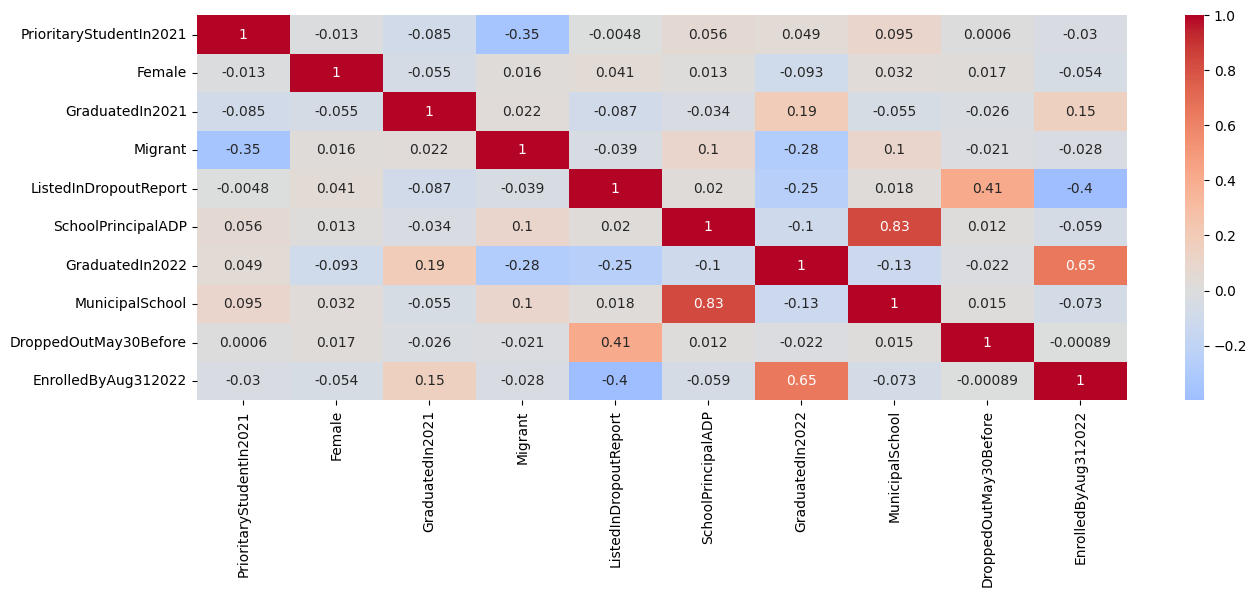

In [ ]:
plt.figure(figsize=(15, 5))
sns.heatmap(df[categoricas2].corr(), annot=True, cmap='coolwarm', center=0,);

In [ ]:
df['report_date'] = '2022-05-30'

In [ ]:
df['report_date'] = pd.to_datetime(df['report_date'])

In [ ]:
df['anticipacion'] = df['report_date'] - df['DropoutDate']

In [ ]:
df.head(3)

,IDstudent,IDschool,SchoolGrade2022,DropoutDate,DayOfWeekDroppedOut,PrioritaryStudentIn2021,Female,Age,GPAin2021,AttendanceIn2021,...,Migrant,ListedInDropoutReport,SchoolPrincipalADP,EnrolledByAug312022,GraduatedIn2022,MunicipalSchool,SchoolDaysFromMay302022,DroppedOutMay30Before,report_date,anticipacion
0,1.0,1,12.0,2022-06-17,5.0,0,0,18,2.0,55,...,0.0,0.0,1.0,0.0,0.0,1.0,-14,0.0,2022-05-30,-18 days
1,2.0,1,9.0,2022-05-13,5.0,0,1,15,2.5,55,...,0.0,1.0,1.0,1.0,0.0,1.0,11,1.0,2022-05-30,17 days
2,3.0,1,10.0,2022-04-20,3.0,1,1,14,4.9,88,...,0.0,0.0,1.0,0.0,0.0,1.0,28,1.0,2022-05-30,40 days


In [ ]:
df['anticipacion'].value_counts().sort_values(ascending=False)

anticipacion
-57 days    307
-56 days    273
-58 days    245
-60 days    207
28 days     197
           ... 
-4 days      85
-35 days     72
-37 days     43
-36 days     27
-21 days     13
Name: count, Length: 61, dtype: int64